In [32]:
# Supress unnecessary warnings so that presentation looks clean

import warnings
warnings.filterwarnings('ignore')



In [33]:
# Importing the libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



References:
+ https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms

In [34]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

ID_test = dataset_test['id']

# Dropping unnecessary columns

dataset_test.drop('id', axis=1, inplace=True)


#Display the first five rows to get a feel of the data
print(dataset_train.head(5))

#Learning : cat1 to cat116 contain alphabets

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]


In [35]:
# Size of the dataframe

print(dataset_train.shape) 

# We can see that there are 188318 instances/observations having 132 attributes

(188318, 132)


In [36]:
# Dropping unnecessary column 'id' in the training set since it just has serial numbers. Not useful
# in the prediction process.

dataset_train = dataset_train.iloc[:, 1:] 



# We dont need index 0. Just all the remaining indexes.

# Statistical description

print(dataset_train.describe())

# Learning :
# No attribute in continuous columns is missing as count is 188318 for all, all rows can be used
# No negative values are present. Tests such as chi2 can be used.
# Statistics not displayed for categorical data.

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [37]:
# Skewness of the distribution

print(dataset_train.skew())

# Values close to 0 show less skew.
# loss shows the highest skew. Let us visualize it.

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [38]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

# Range of features considered
split = 116

# Number of features considered
size = 15

# Creating a dataframe with only continuous features
data = dataset_train.iloc[:, split:]
# print(data)
print(data.head(5))


      cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  


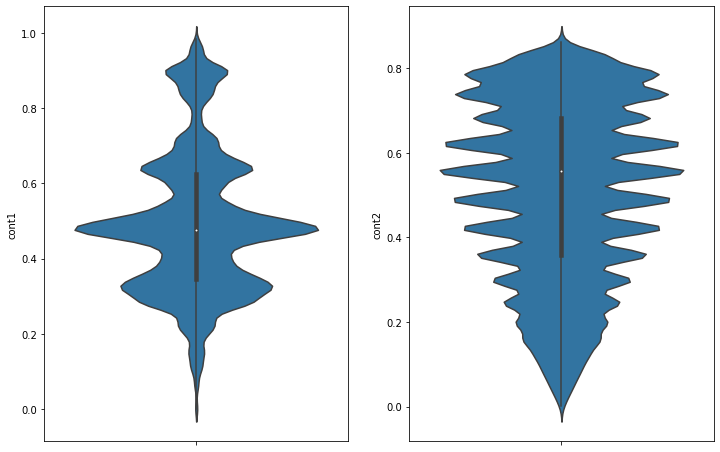

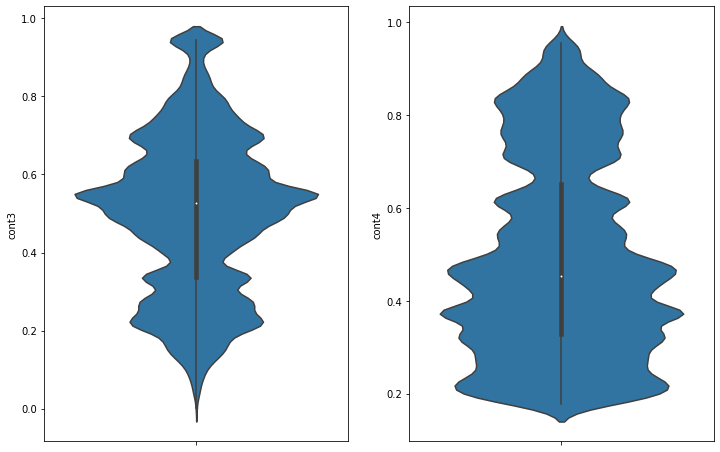

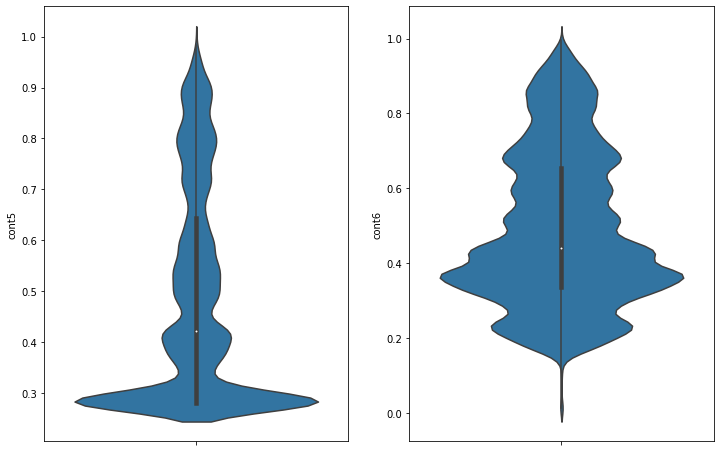

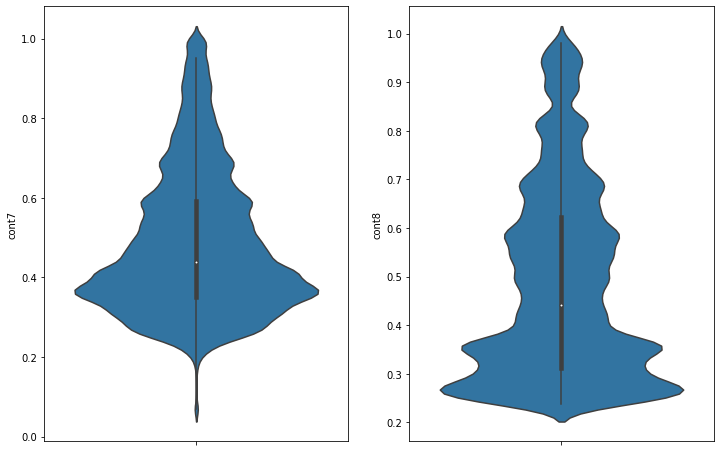

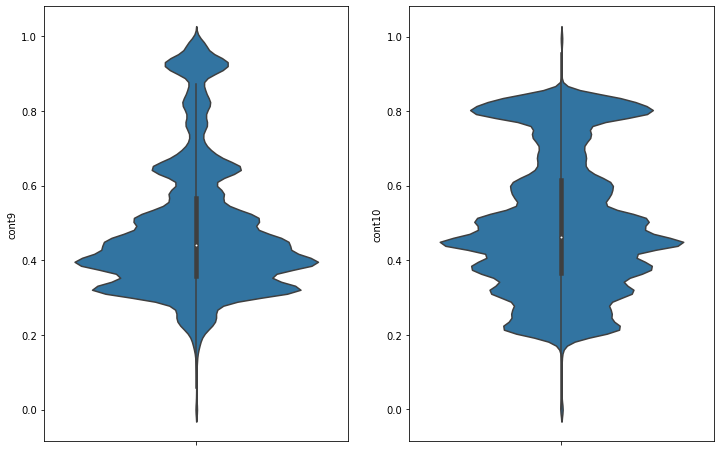

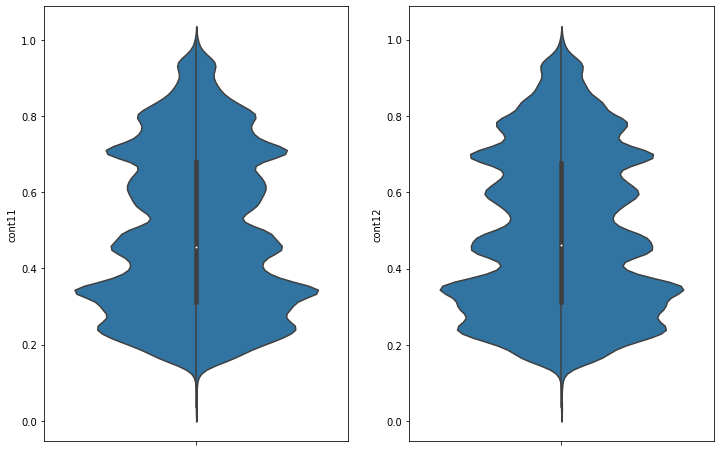

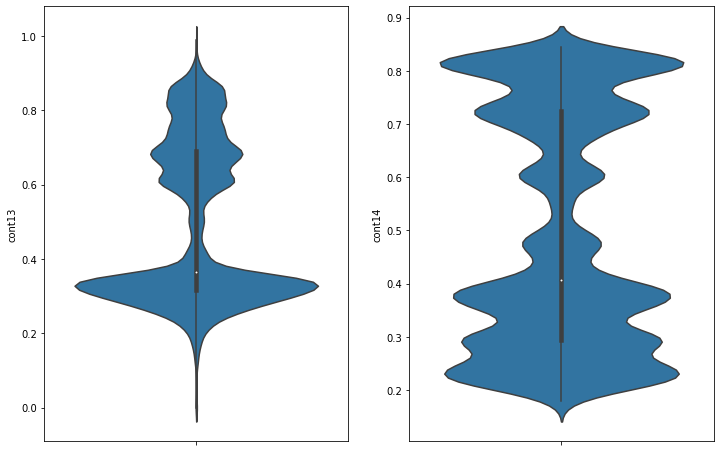

In [39]:
# Getting the names of all the columns
cols=data.columns 

# Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset_train, ax=ax[j])
        

# Learning:        
#cont1 has many values close to 0.5
#cont2 has a pattern where there a several spikes at specific points
#cont5 has many values near 0.3
#cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration
#loss distribution must be converted to normal

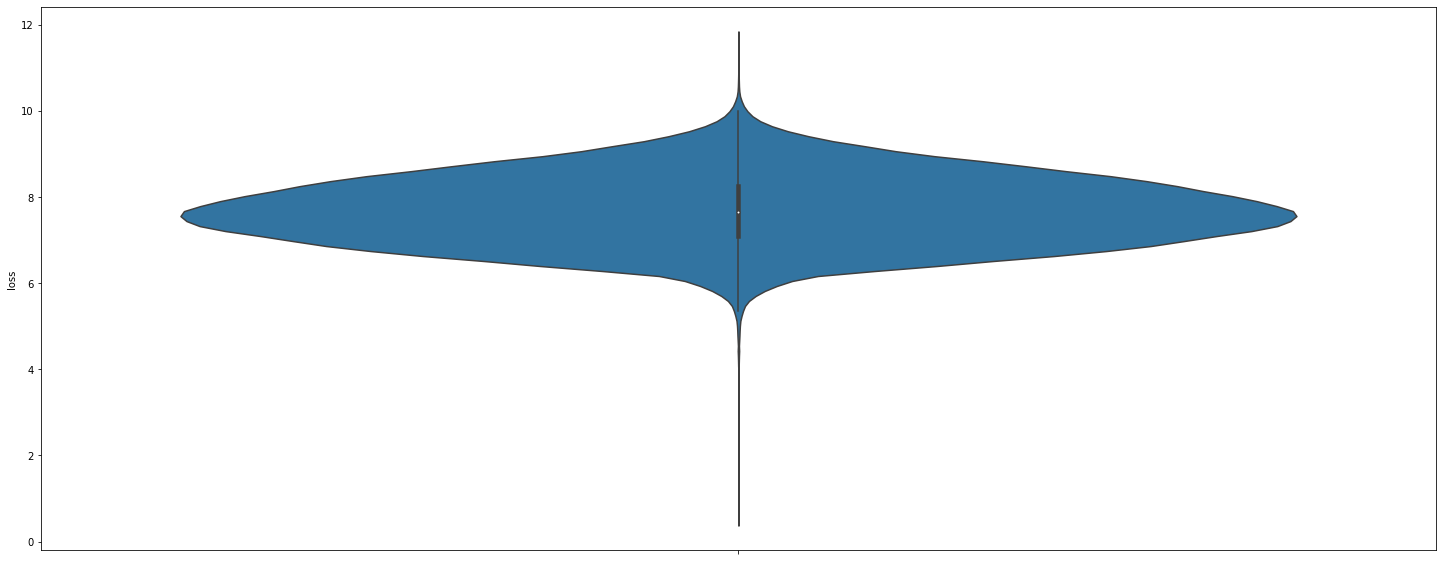

0    7.702637
1    7.158203
2    8.008396
3    6.846784
4    7.924742
Name: loss, dtype: float64


In [40]:
# DATA TRANSFORMATION 
# ---> Skew Correction


#log1p function applies log(1+x) to all elements of the column
dataset_train["loss"] = np.log1p(dataset_train["loss"])
#visualize the transformed column
sns.violinplot(data=dataset_train,y="loss")  
plt.show()

#Plot shows that skew is corrected to a large extent
print(dataset_train["loss"].head(5))

In [41]:
# DATA INTERACTION
# ---> Correlation

# Correlation tells relation between two attributes.
# Correlation requires continuous data. Therefore, we can ignore categorical data.

# Calculating Pearson coefficient for all combinations

data_corr = data.corr()
print(data_corr)

# Setting the threshold to select only highly correlated attributes

threshold = 0.5

# List of pairs along with correlation above threshold

corr_list = []

print("##########################")
print(data_corr.iloc[0,1])

# Searching for the highly correlated pairs

for i in range(0, size): #for "size" features
    for j in range(i+1, size):
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) # stores coeffient and appropriate column indexes

            
# Sorting to show higher ones first            

s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0])) # See key function, https://docs.python.org/3/howto/sorting.html


print("##########################")

# Printing coefficients and column names

for v, i, j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i],cols[j],v))
    
# LEARNING

# We see there is a strong correlation between the following pairs: 
# This represents an opportunity to reduce the feature set through transformations such as PCA


           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

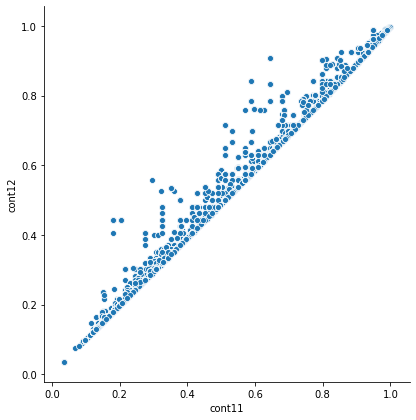

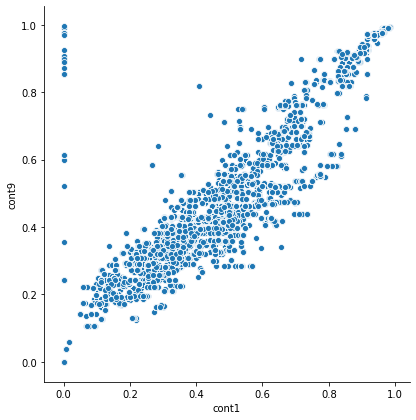

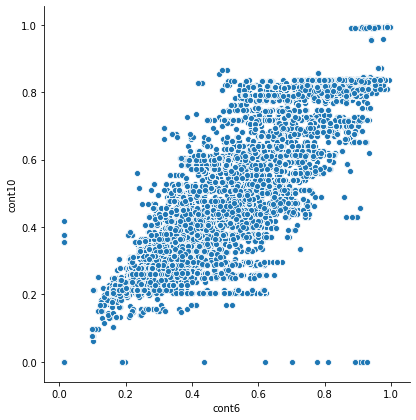

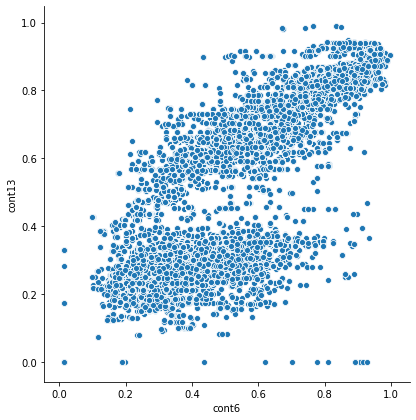

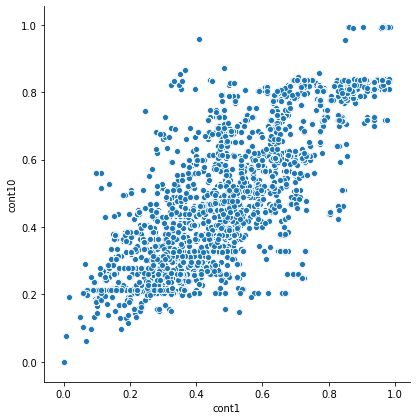

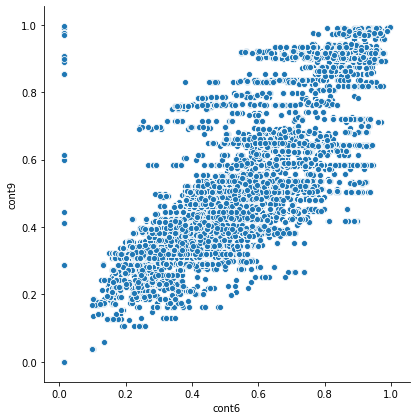

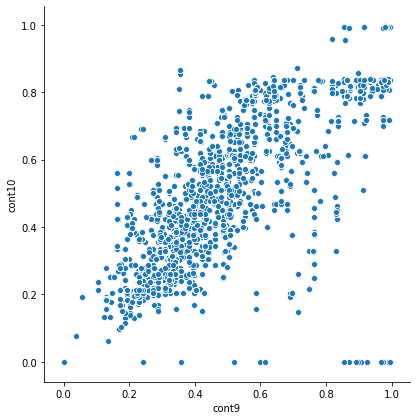

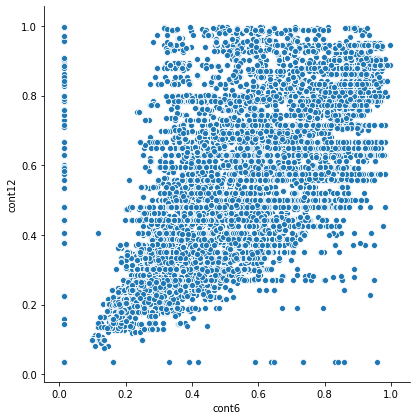

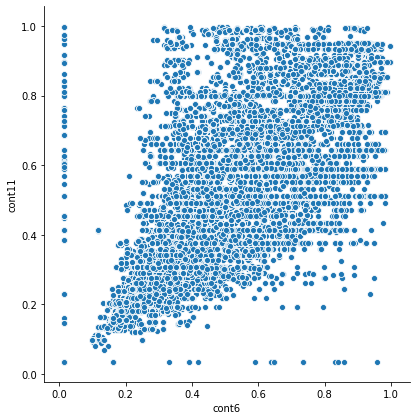

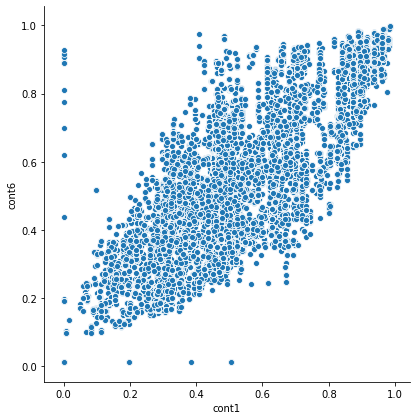

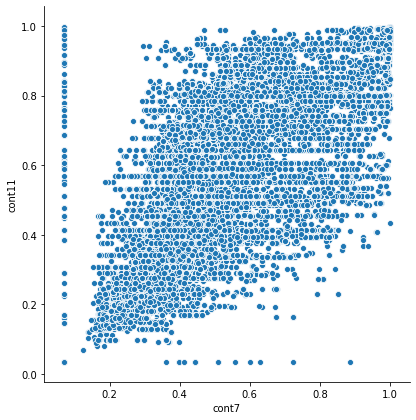

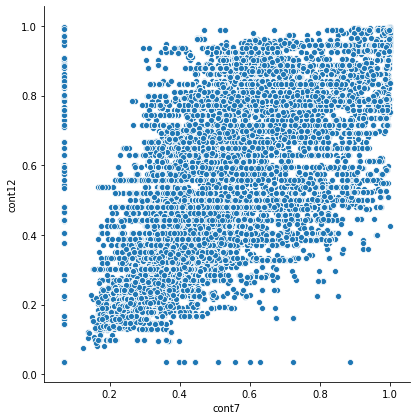

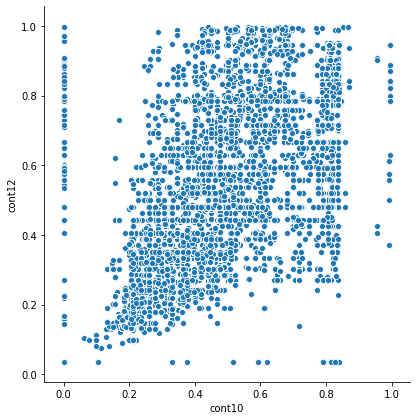

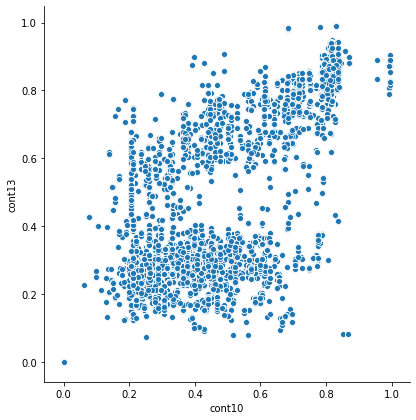

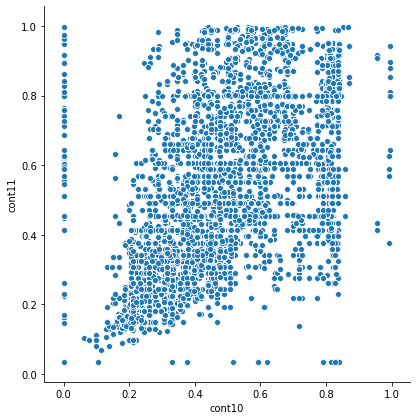

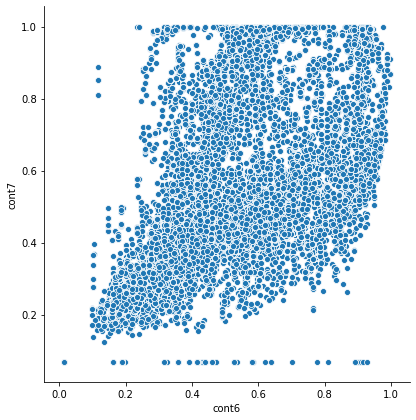

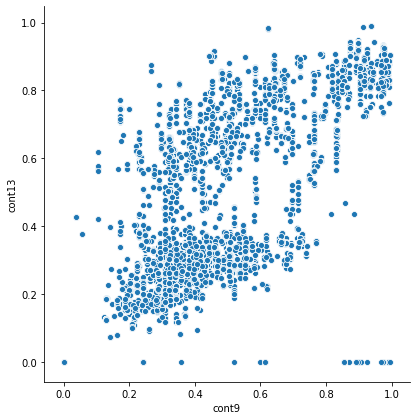

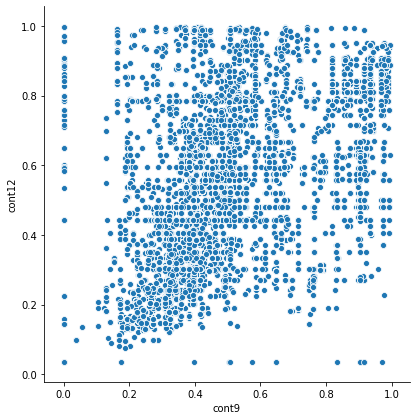

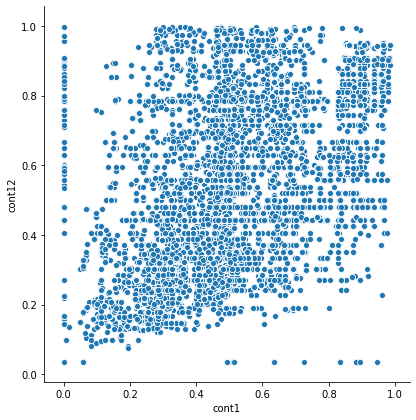

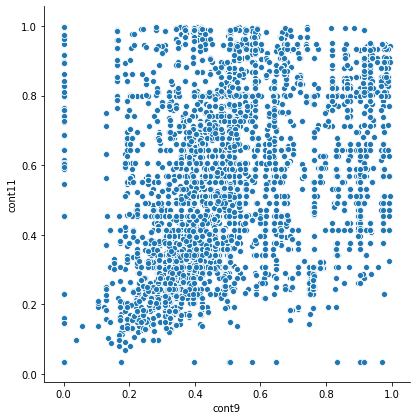

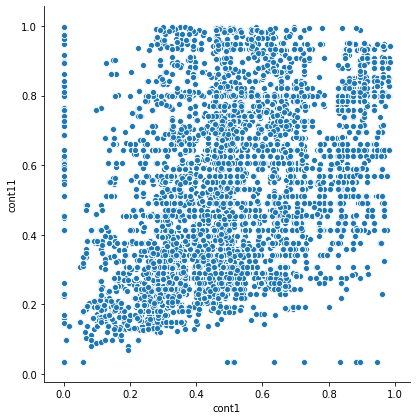

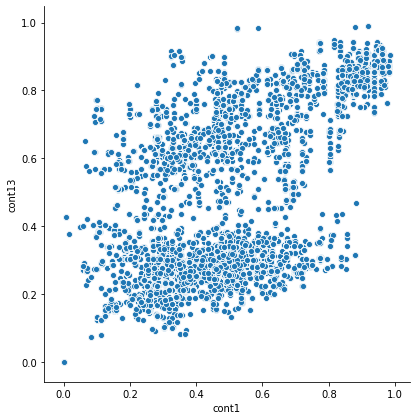

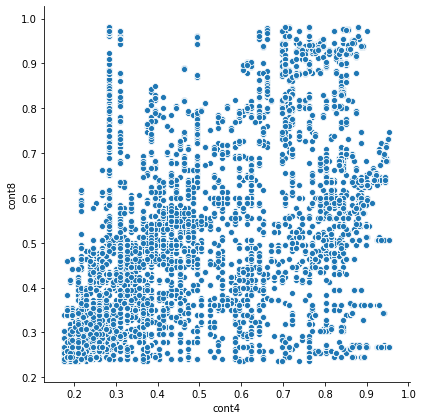

In [42]:
# Scatter plot of all the highly correlated pairs
for v, i, j in s_corr_list:
    sns.pairplot(dataset_train, size=6, x_vars=cols[i], y_vars=cols[j])
    plt.show

# cont11 and cont12 give an almost perfect linear pattern
# cont1 and cont9  give an almost perfect linear pattern
# cont6 and cont10 also show a very good combination

#therefore one of these can be removed from each pair

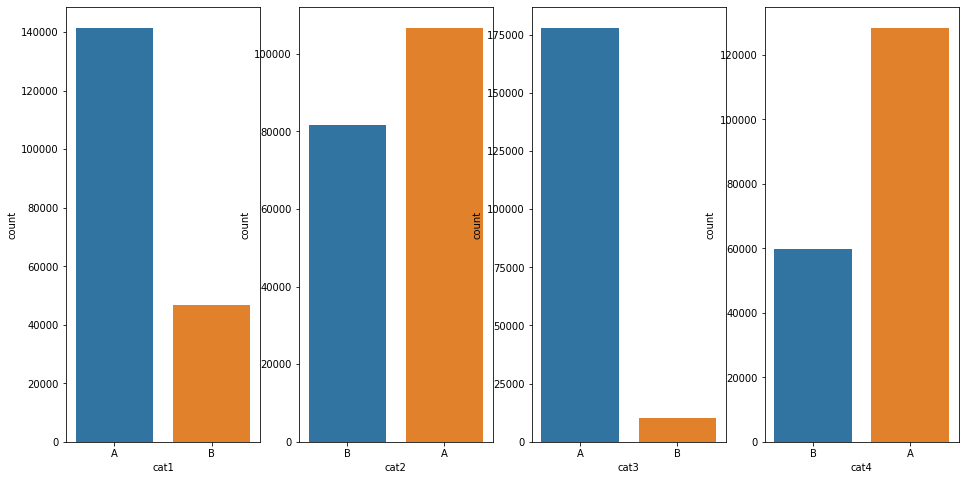

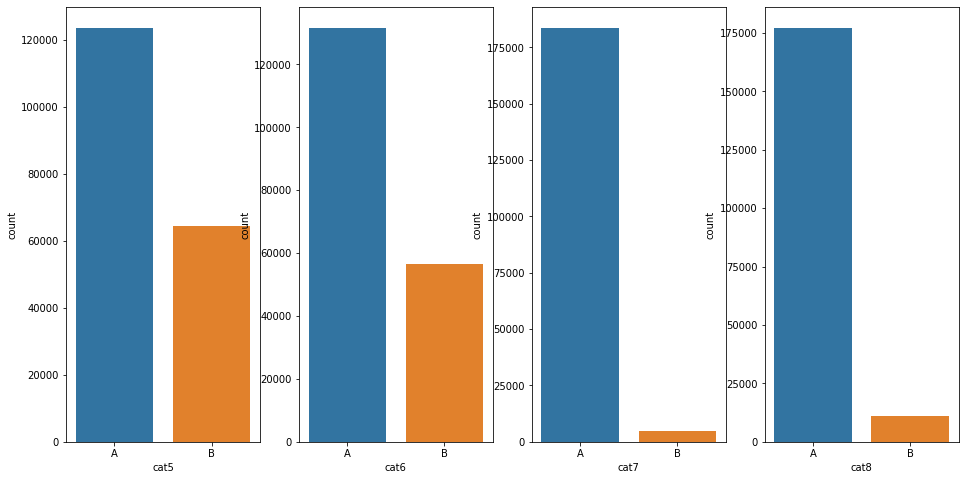

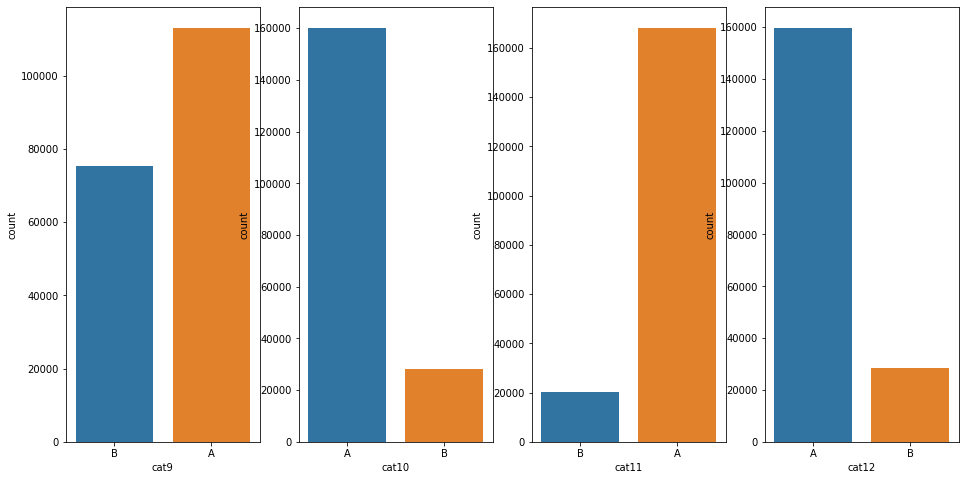

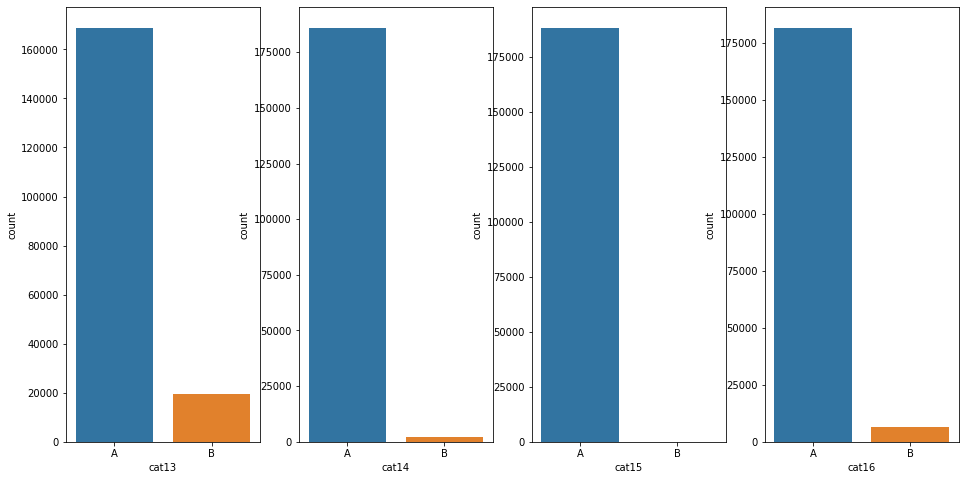

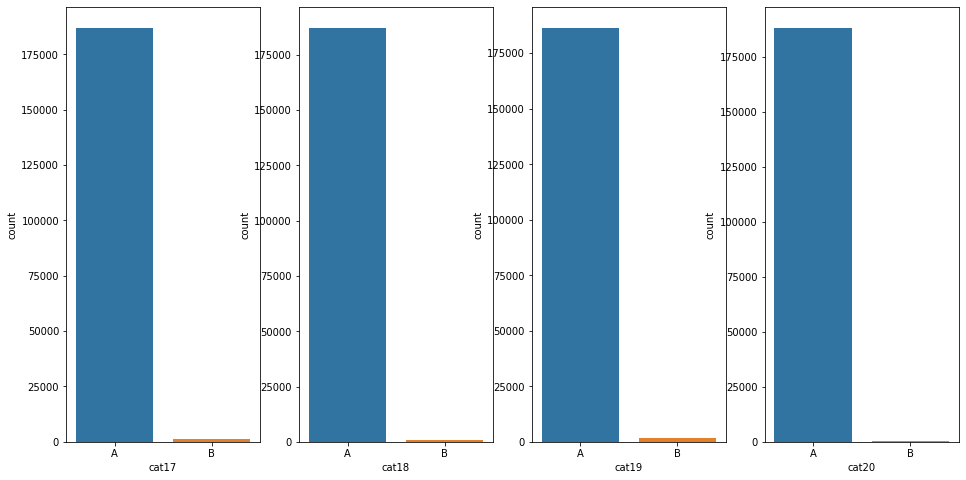

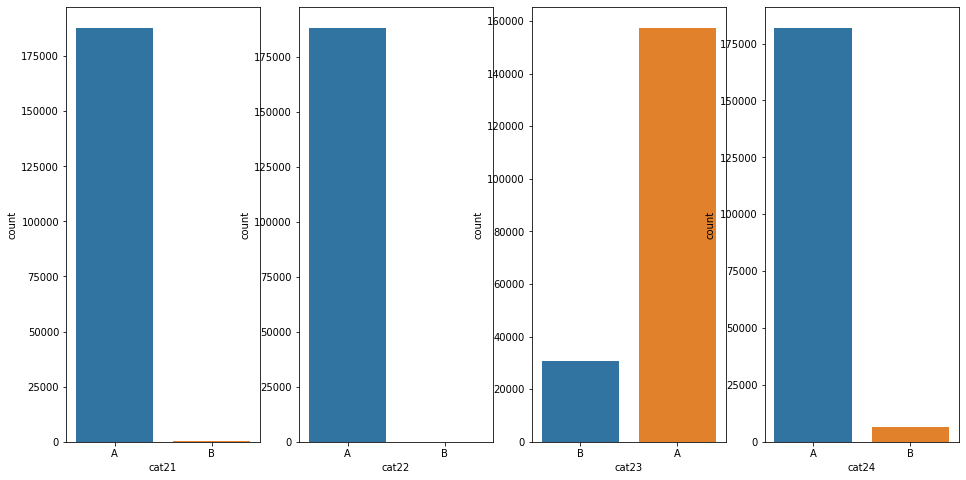

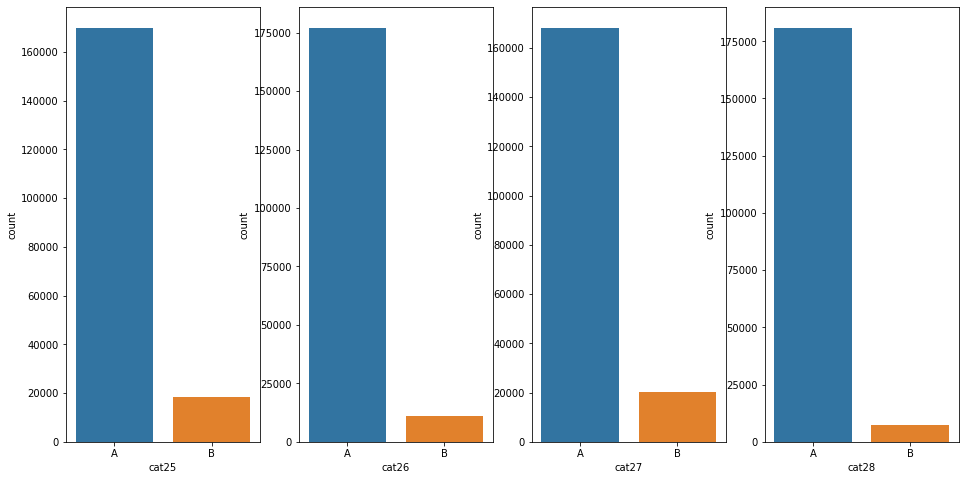

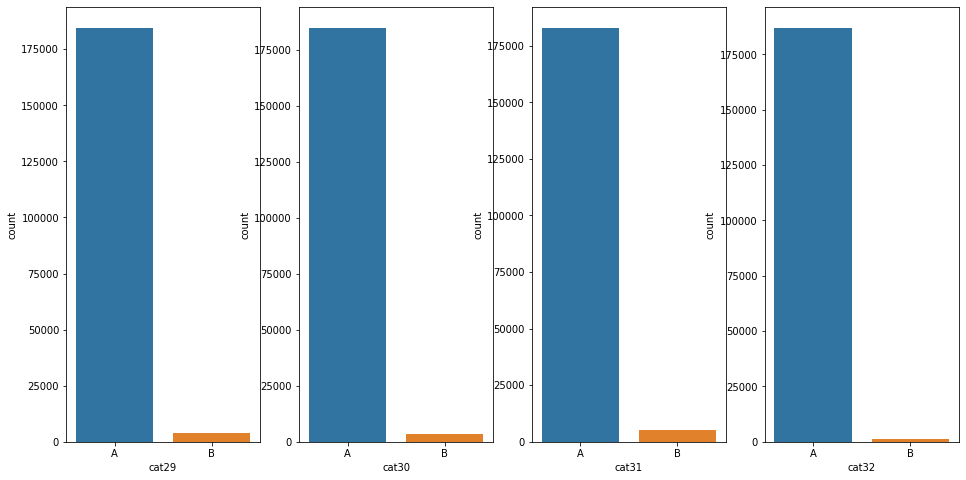

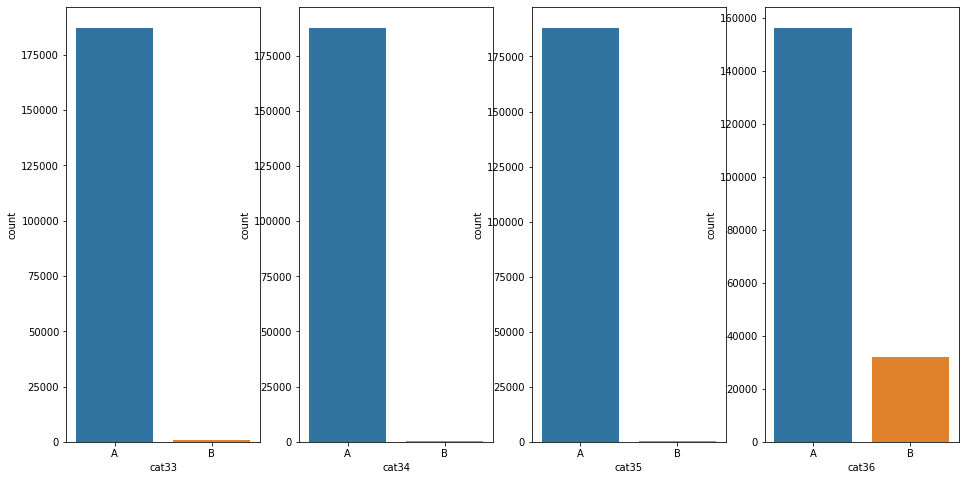

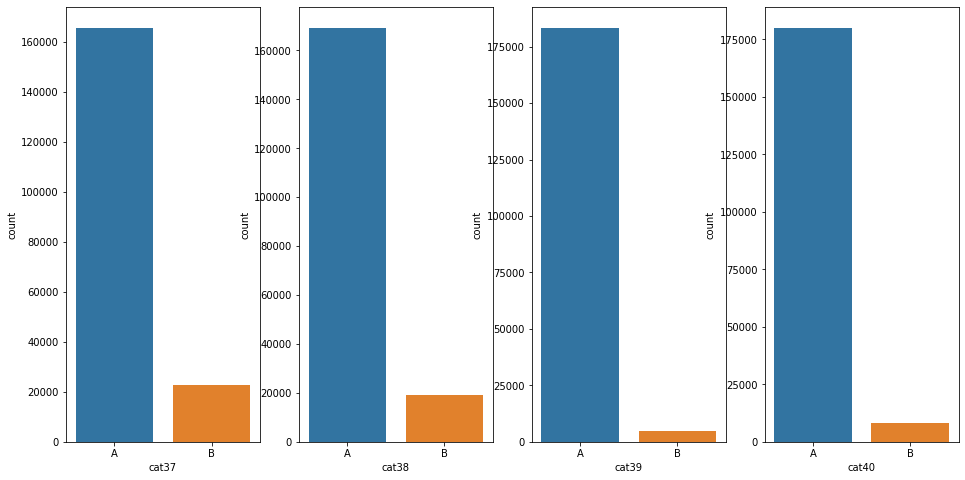

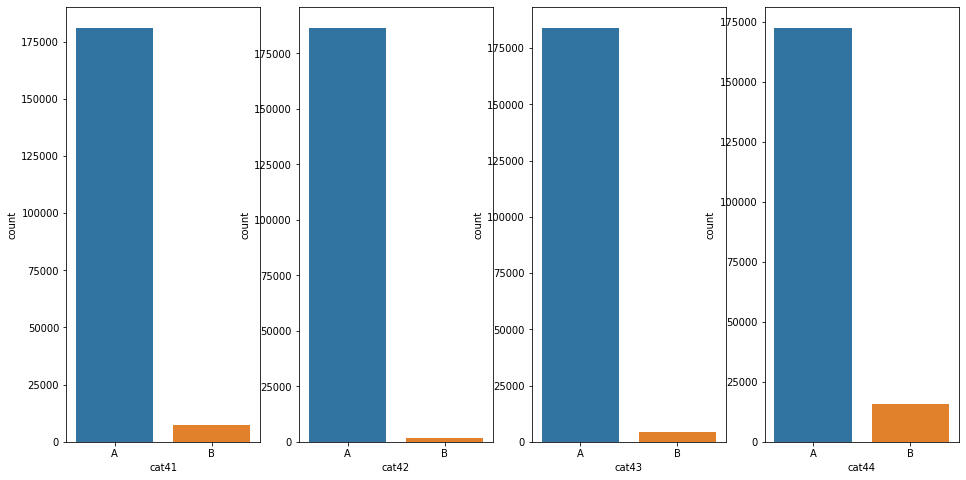

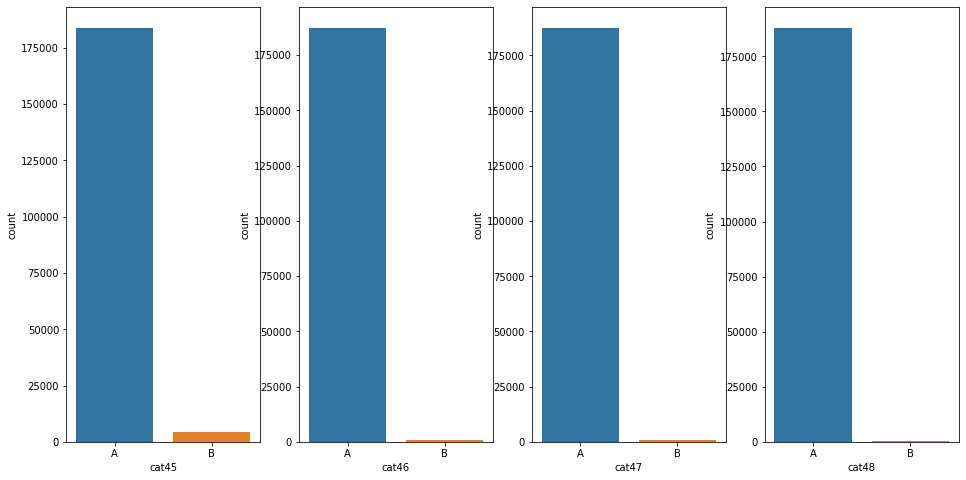

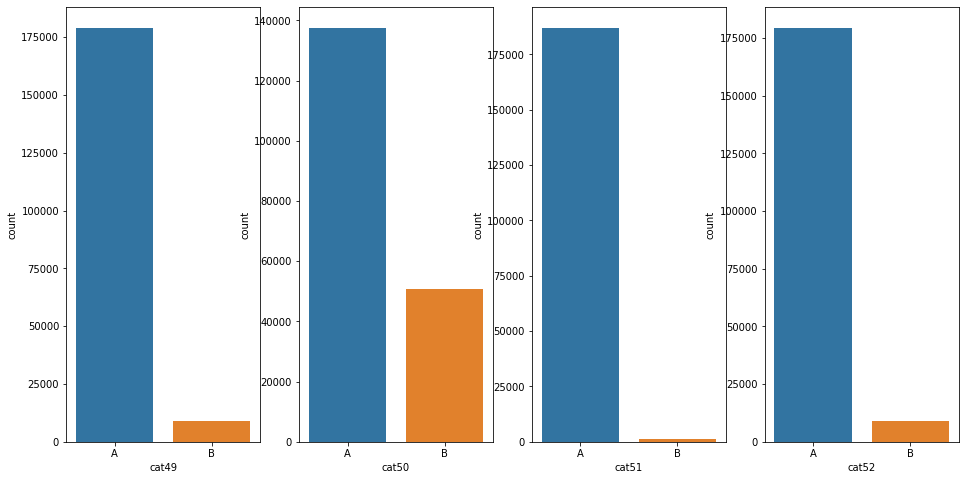

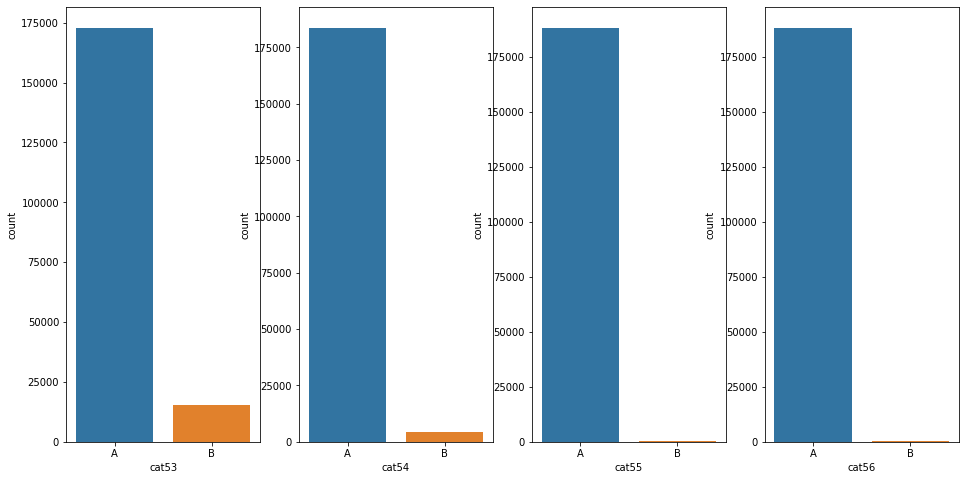

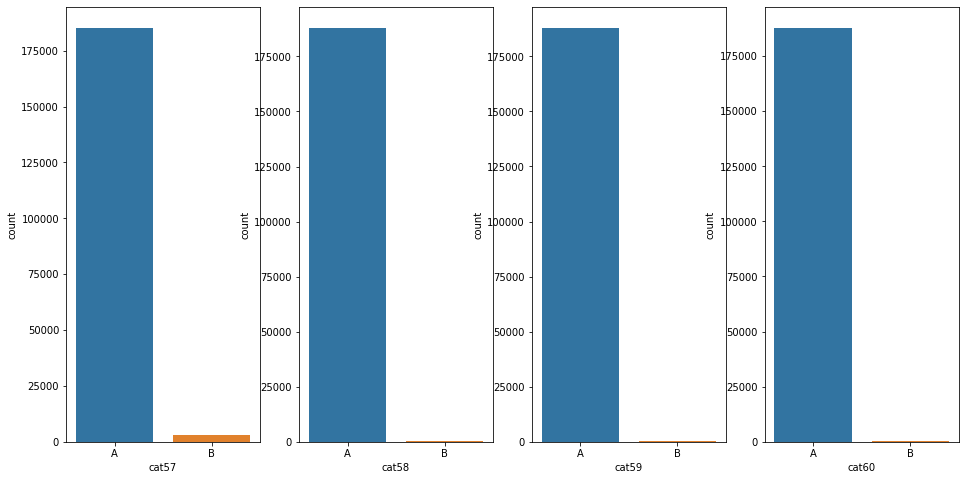

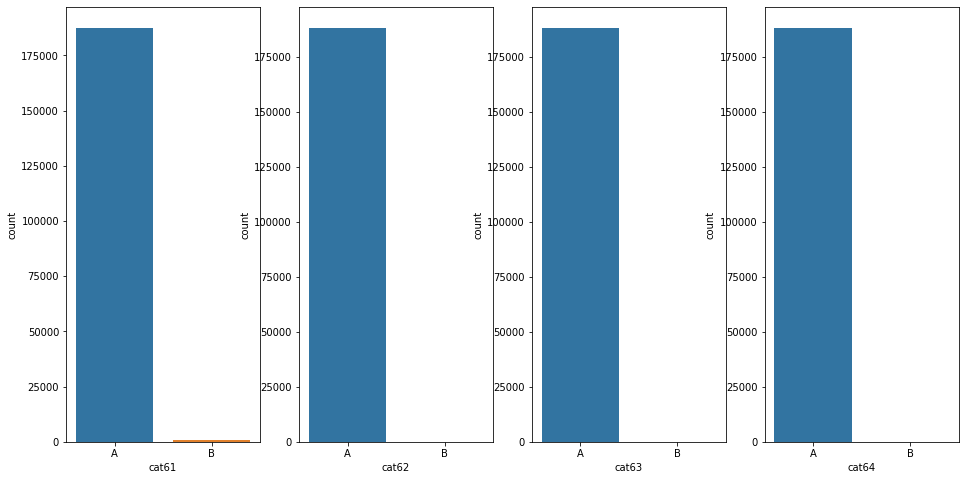

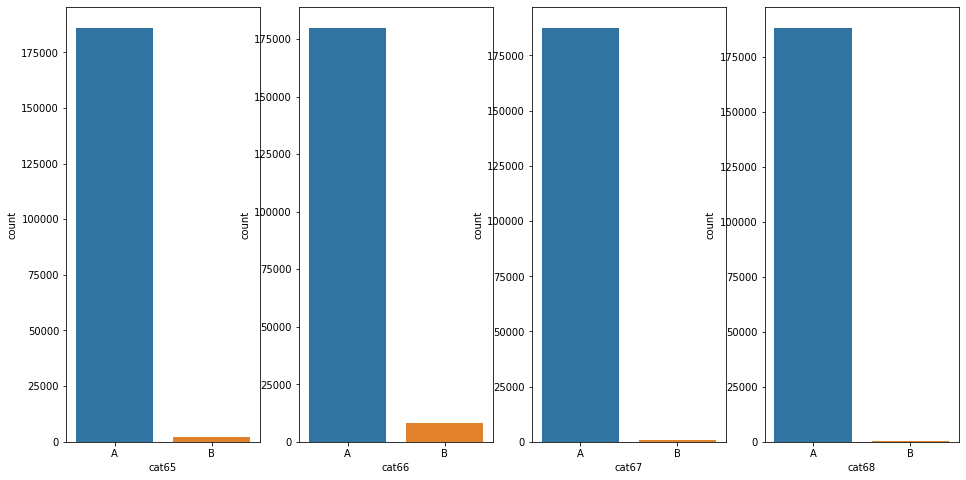

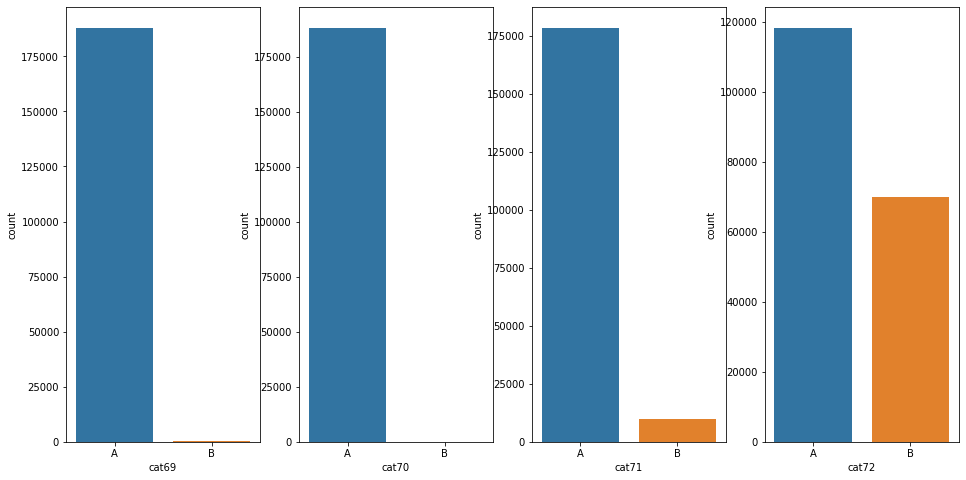

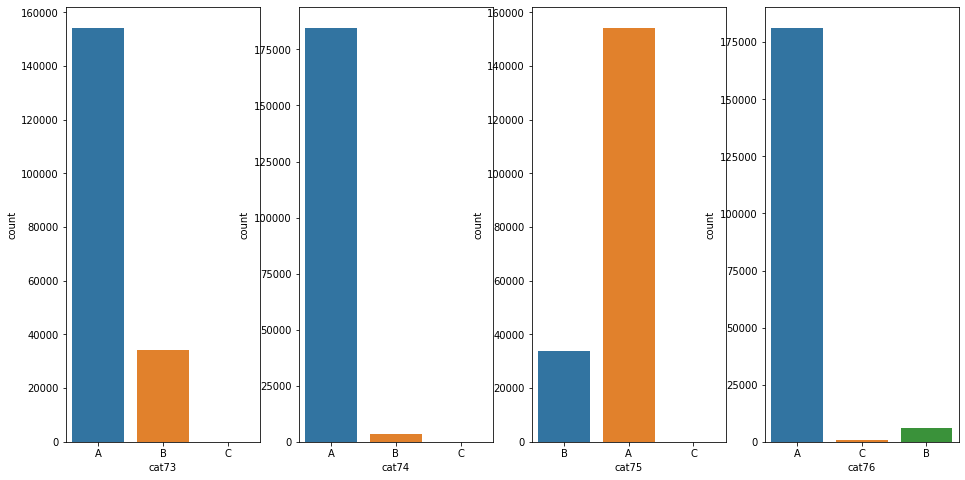

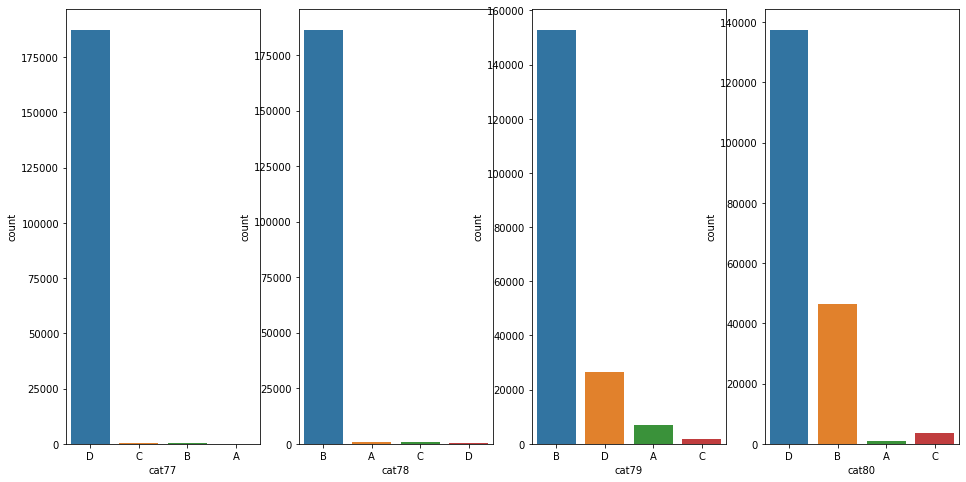

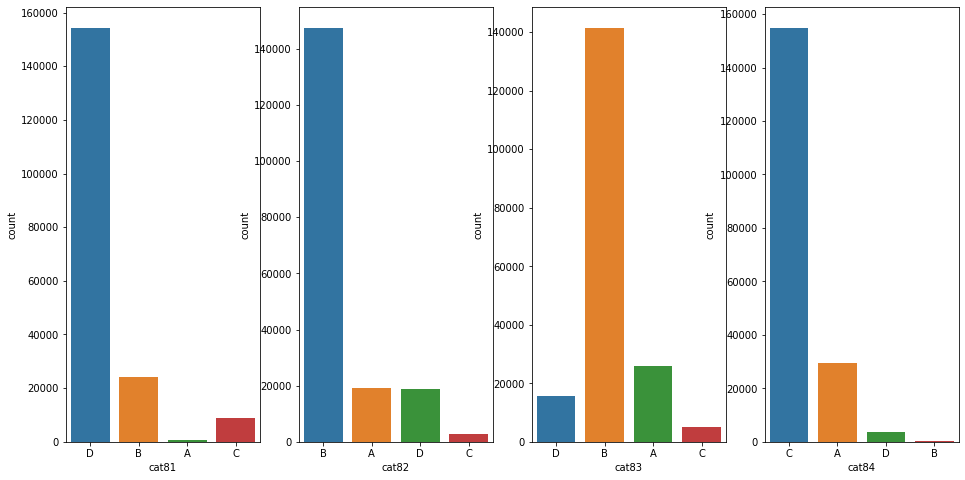

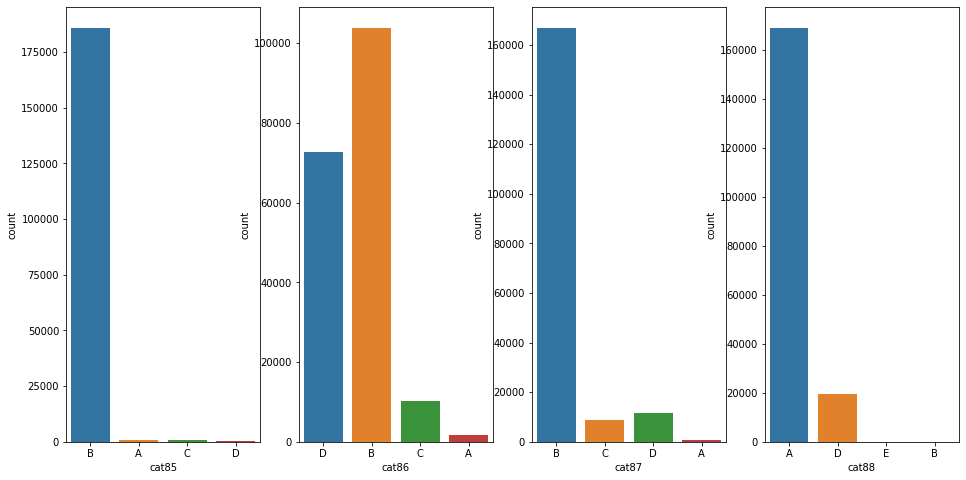

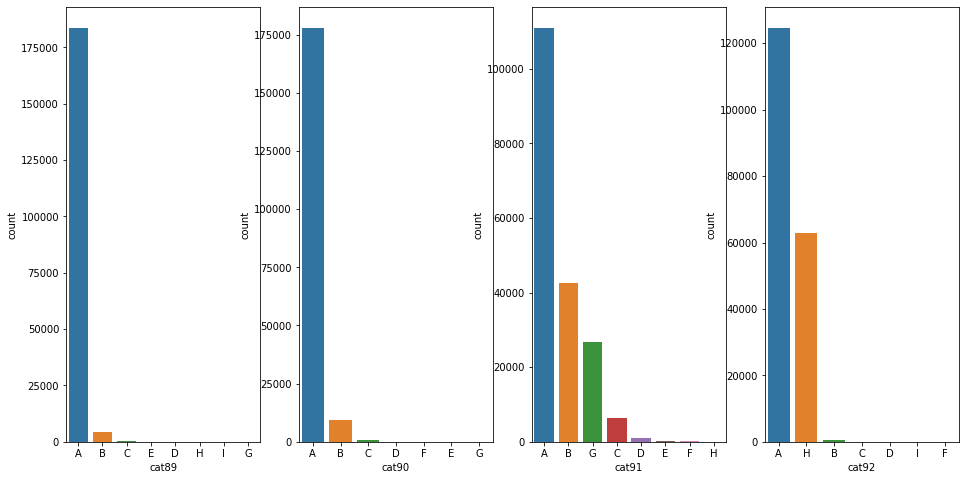

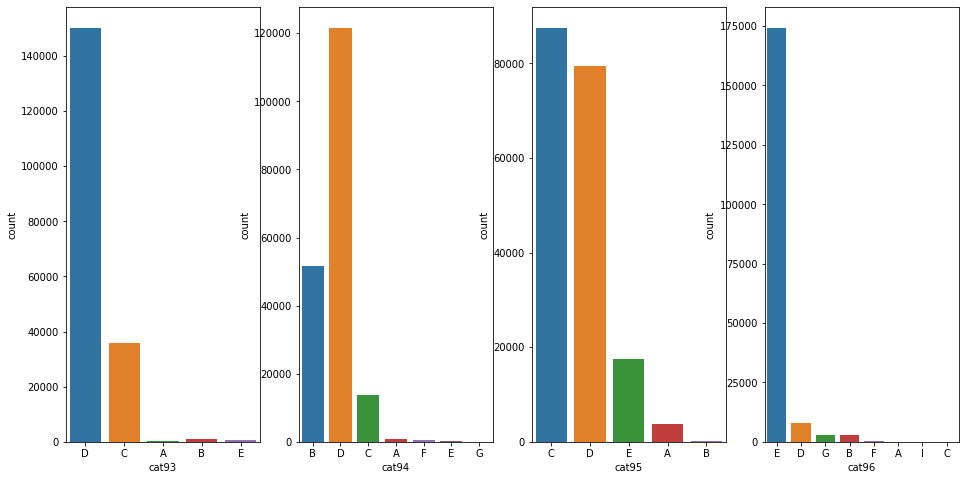

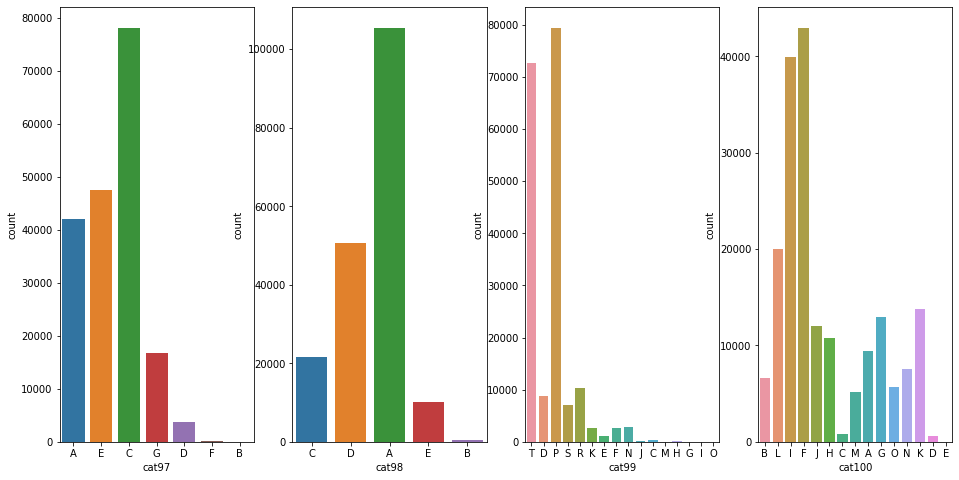

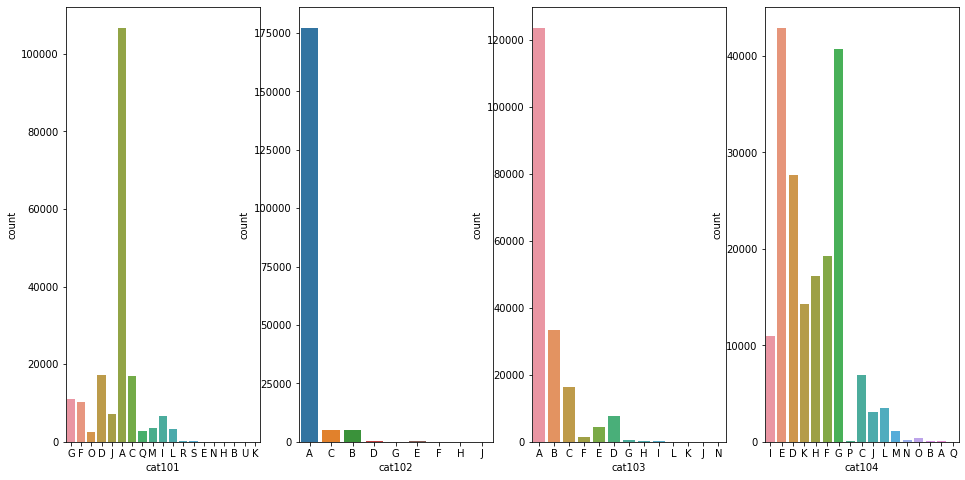

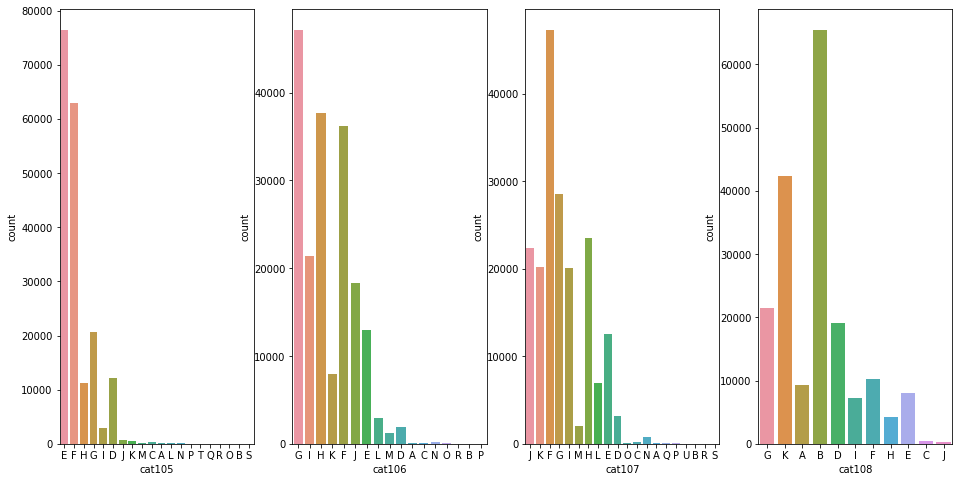

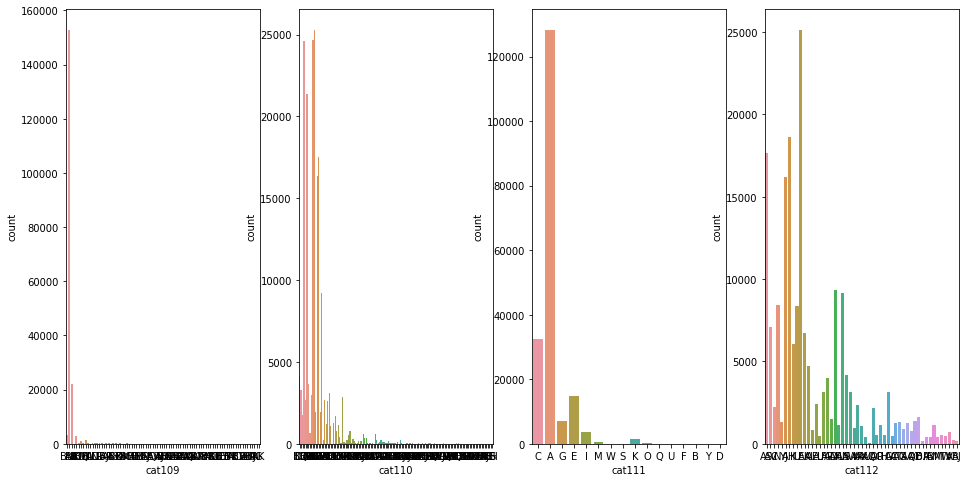

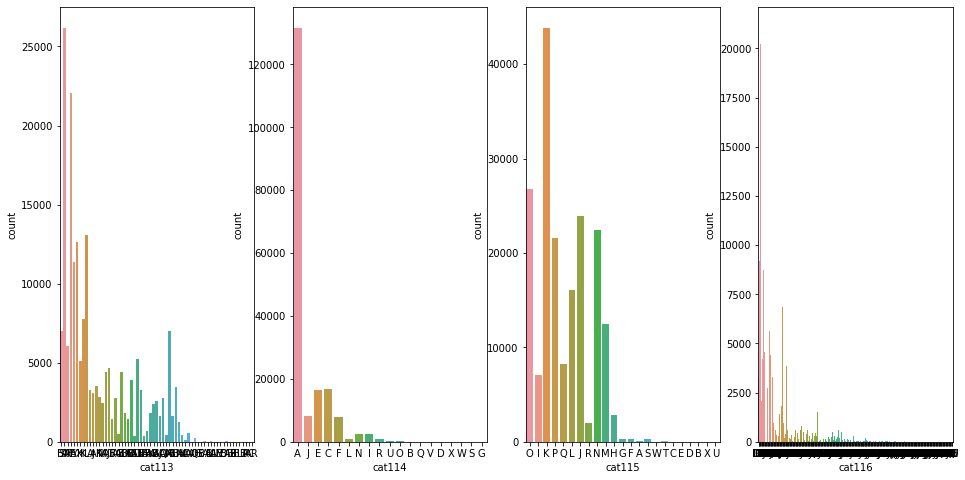

In [43]:
# DATA VISUALIZATION
# ---> Categorical attributes

# Names of all the categorical columns

cols = dataset_train.columns

# Plot count plot for all attributes in a 29x4 (116 in total) grid


n_rows = 29
n_cols = 4

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16,8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset_train, ax=ax[j])
       
    
# LEARNING
# cat1 to cat72 have only two labels A and B. 
# In most of the cases, B has very few entries.
# cat73 to cat 108 have more than two labels
# cat109 to cat116 have many labels



In [44]:
print(dataset_train.iloc[2:3, :-15].values) # debugging, manually writing to see correct index of columns

[['A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'A'
  'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B'
  'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
  'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
  'A' 'A' 'A' 'A' 'D' 'B' 'B' 'B' 'D' 'B' 'D' 'C' 'B' 'B' 'B' 'A' 'A' 'A'
  'A' 'A' 'D' 'D' 'C' 'E' 'E' 'A' 'D' 'L' 'O' 'A' 'B' 'E' 'F' 'H' 'F' 'A'
  'AB' 'DK' 'A' 'C' 'AF' 'A' 'I' 'GK']]


In [45]:
print(dataset_train.shape)

(188318, 131)


In [46]:
# DATA PREPARATION

# Turning cat1 to cat116 into numerical data.
# One-hot encoding converts an attribute to a binary vector.

# Variable to store the list of variables for an attribute in the train and test set

labels = []

# Making sure we account for all of the unique variables that show up in both the training and test set provided. 
# For instance, this ensures we dont run into any unforeseen variables when going from the training set to test set.
for i in range(0, split):
    train = dataset_train[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test))) #note the OR operator!

print("labels %s" % labels)
    
#del dataset_test


# Importing OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_train.iloc[:,i])
    feature = feature.reshape(dataset_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)


    
print("################")
print("List of 1D array of cats--> %s" % cats)
print("################")
# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)
print("2D array of cats--> %s" % encoded_cats)
print("################")
print(encoded_cats.shape)
print("################")

#Concatenate encoded attributes with continuous attributes
dataset_train_encoded = np.concatenate((encoded_cats,dataset_train.iloc[:,split:].values),axis=1)
del cats
del dataset_train
del encoded_cats


# Print the shape of the encoded data
print(dataset_train_encoded.shape)
print("################")




labels [['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B', 'C'], ['A', 'B', 'C'], ['A', 'B', 'C'], ['A', 'B', 'C'], ['A', 'B', 'D', 'C'], ['A', 'B', 'D', 'C'], ['A', 'B', 'D', 

2D array of cats--> [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
################
(188318, 1176)
################
(188318, 1191)
################


In [47]:
# DATA PREPARATION
# ---> Splitting the data into train and test/valid

In [48]:
# Getting the number of rows and columns

r, c = dataset_train_encoded.shape


# Creating an array which has indexes of columns
i_cols = []

for i in range(0, c-1):
    i_cols.append(i)

# Y is the target column, X has the rest
X = dataset_train_encoded[:, 0:(c-1)]
Y = dataset_train_encoded[:, (c-1)]

del dataset_train_encoded


# Validation chunk size
val_size = 0.1

# Using a common seed in all experiments so that same chunk is used for validation
seed = 0

# Splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=val_size, random_state=seed)

del X
del Y


# All features
X_all = []


# List of combinations
comb = []

# Dictionary to store the Mean Absolute Error for all algorithms
mae = []


#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list
n = "All"

#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])


In [49]:
print(X_all)     # all the columns along with dummy vars
print(type(X_all))

[['All', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [50]:
# LINEAR REGRESSION (Linear Algo)



# Fitting Linear Regression to the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1) # using all processors
algo = "LR"

# Accuracy of the model using all features
for name, i_cols_list in X_all:
    print(name)
    lin_reg.fit(X_train[:, i_cols_list], y_train) #fitting all features to the target column
    result = mean_absolute_error(np.expm1(y_test), np.expm1(lin_reg.predict(X_test[:,i_cols_list])))
    mae.append(result)
    print(name + " %s" % result)

comb.append(algo)
print(comb)

'''
MODEL OUTPUT: 

All 1276.0276564234468
['LR']
'''    

# #Plot the MAE of all combinations
# fig, ax = plt.subplots()
# plt.plot(mae)
# #Set the tick names to names of combinations
# ax.set_xticks(range(len(comb)))
# ax.set_xticklabels(comb,rotation='vertical')
# #Plot the accuracy for all combinations
# plt.show()    

All
All 1276.0276564234468
['LR']


"\nMODEL OUTPUT: \n\nAll 1276.0276564234468\n['LR']\n"

In [51]:
# KNN (Non-linear Algo)


# Evaluation of various combinations of KNN

# Fitting Classifier to the Training set
from sklearn.neighbors import KNeighborsRegressor     
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html



# Add the N value to the below list if you want to run the algo

n_list = np.array([]) #note, when the list is empty, the algo doesnt run
'''
With n_list = np.array([5])

All 1434.788795356784
['LR', 'KNN 5']
'''

'''
With n_list = np.array([2])

All 1526.7442802258656
['LR', 'KNN 2']
'''

# we can use multiple values into n_list if we want to search for the optimal n_neighbors. However, xgboost is usally the best for parameter tuning.
for n_neighbors in n_list:
    # Setting the base model
    regressor = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
    
    algo = "KNN"

    #Accuracy of the model using all features
    for name, i_cols_list in X_all:
        regressor.fit(X_train[:, i_cols_list], y_train) #fitting all features to the target column
        result = mean_absolute_error(np.expm1(y_test), np.expm1(regressor.predict(X_test[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
    comb.append(algo + " %s" % n_neighbors)
    
print(comb)


# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1527)
    comb.append("KNN" + " %s" % 2 )



##Set figure size, this figure compares mae for all of the algorithms ran

#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Very high computation time
#Best estimated performance is 1745 for n=1



# LEARNING:
# KNN 5 performed the best. Lowest MAE.

['LR']


In [52]:
# CART (Non-linear Algo)


 #Evaluation of various combinations of CART

#Import the library
from sklearn.tree import DecisionTreeRegressor

#Add the max_depth value to the below list if you want to run the algo
d_list = np.array([])

for max_depth in d_list:
    #Set the base model
    model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
    
    algo = "CART"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % max_depth )

    
# since we know the outcome, we can skip the algorithm and append the result
if (len(d_list)==0):
    mae.append(1741)
    comb.append("CART" + " %s" % 5 )    
    
    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#High computation time
#Best estimated performance is 1741 for depth=5



In [53]:
# SVM (Non-linear Algo)

#Import the library
from sklearn.svm import SVR

#Add the C value to the below list if you want to run the algo
c_list = np.array([])

for C in c_list:
    #Set the base model
    model = SVR(C=C)
    
    algo = "SVM"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % C )

    
    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very very high computation time, not running

In [54]:
# Bagged Decision Trees (Bagging)


#Evaluation of various combinations of Bagged Decision Trees



#Import the library
from sklearn.ensemble import BaggingRegressor
#from sklearn.tree import DecisionTreeRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Setting the base model
    model = BaggingRegressor(n_jobs=-1,n_estimators=n_estimators)
    
    algo = "Bag"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very high computation time, not running

In [55]:
# Random Forest (Bagging)


# Evaluation of various combinations of RandomForest

#Import the library
from sklearn.ensemble import RandomForestRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "RF"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

    
# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1213)
    comb.append("RF" + " %s" % 50 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1213 when the number of estimators is 50

In [56]:
# Extra Trees (Bagging)


#Evaluation of various combinations of ExtraTrees

#Import the library
from sklearn.ensemble import ExtraTreesRegressor


#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "ET"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

    
    
# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1254)
    comb.append("ET" + " %s" % 100 )    
    
    

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1254 for 100 estimators

In [57]:




#Evaluation of various combinations of AdaBoost

#Import the library
from sklearn.ensemble import AdaBoostRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "Ada"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )
    
    
# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1678)
    comb.append("Ada" + " %s" % 100 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1678 with n=100

In [58]:
# Stochastic Gradient Boosting (Boosting)




#Evaluation of various combinations of SGB

#Import the library
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "SGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1278)
    comb.append("SGB" + " %s" % 50 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is ?

In [59]:
 #XGBoost
    
    
    
    
    
#Evaluation of various combinations of XGB

#Import the library
from xgboost import XGBRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = XGBRegressor(n_estimators=n_estimators,seed=seed)
    
    algo = "XGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

# since we know the outcome, we can skip the algorithm and append the result
if (len(n_list)==0):
    mae.append(1169)
    comb.append("XGB" + " %s" % 1000 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1169 with n=1000

mae--> [1276.0276564234468, 1527, 1741, 1213, 1254, 1678, 1278, 1169, 1168]
comb--> ['LR', 'KNN 2', 'CART 5', 'RF 50', 'ET 100', 'Ada 100', 'SGB 50', 'XGB 1000', 'MLP baseline']


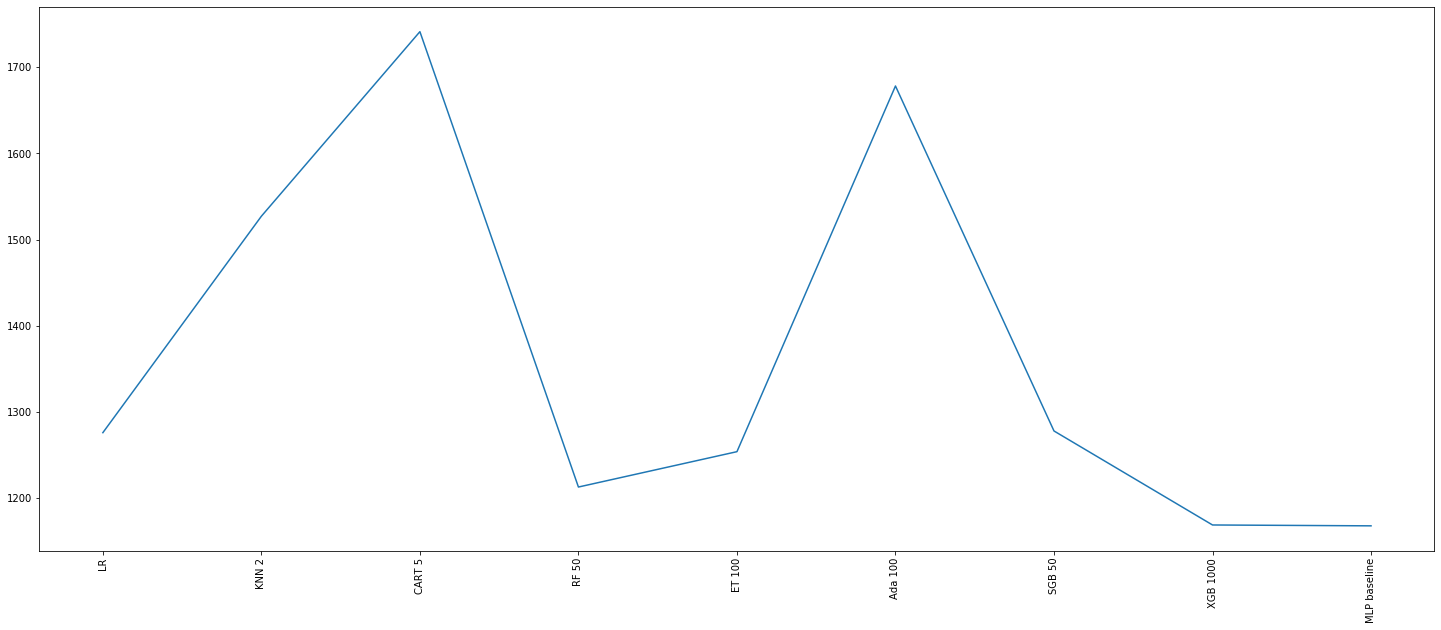

In [60]:
#MLP (Deep Learning)


#Evaluation of various combinations of multi-layer perceptrons

#Import libraries for deep learning
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# define baseline model
def baseline(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define smaller model
def smaller(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1)/2, input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal', activation='relu'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define deeper model
def deeper(v):
 # create model
 model = Sequential()
 model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
 model.add(Dense(v*(c-1)/2, init='normal', activation='relu'))
 model.add(Dense(1, init='normal', activation='relu'))
 # Compile model
 model.compile(loss='mean_absolute_error', optimizer='adam')
 return model

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

def dropout(v):
    #create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model

# define decay model
def decay(v):
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model


est_list = []
#uncomment the below if you want to run the algo
#est_list = [('MLP',baseline),('smaller',smaller),('deeper',deeper),('dropout',dropout),('decay',decay)]

for name, est in est_list:
 
    algo = name

    #Accuracy of the model using all features
    for m,i_cols_list in X_all:
        model = KerasRegressor(build_fn=est, v=1, nb_epoch=10, verbose=0)
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo )
    
    
# since we know the outcome, we can skip the algorithm and append the result
if (len(est_list)==0):
    mae.append(1168)
    comb.append("MLP" + " baseline" )    
    
    
    
print("mae--> %s" % mae)
print("comb--> %s" % comb)
##Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is MLP=1168

In [ ]:
'''
Since XGBRegressor is showing the best performance, we can select it as our best model. Therefore, we now need to finalize the model with all of the avialable data.
'''


# note, X_train and X_test are both coming from the training set CSV. axis=0 is stacking rows on top of one another.
X = np.concatenate((X_train,X_test), axis=0) 
del X_train
del X_test
Y = np.concatenate((y_train,y_test),axis=0)
del y_train
del y_test

print("I am here 0 - debug")


n_estimators = 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
print("I am here 0.0 - debug")
best_model.fit(X,Y)
print("I am here 0.1 - debug")
del X
del Y
#Read test dataset
dataset_test = pd.read_csv("test.csv")
print("I am here 0.2 - debug")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
print("I am here 1 - debug")
for i in range(0, split):
    # label encoding
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encoding
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

print("I am here 2 - debug")
# Making a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)
del cats

# Concatenating encoded attributes with continous attributes
X_test = np.concatenate((encoded_cats, dataset_test.iloc[:,split:].values), axis=1)
print("I am here 3 - debug")
del encoded_cats
del dataset_test

# Making predictions using the best model now
predictions = np.expm1(best_model.predict(X_test))



